## ДОМАШНЕЕ ЗАДАНИЕ 2. Модели предсказания
**Цель работы**\
Приобрести опыт решения практических задач по машинному обучению, таких как анализ и визуализация исходных данных, обучение, выбор и оценка качества моделей предсказания, посредством языка программирования Python.

При выполнении работы решаются следующие задачи:

    реализация собственных классов совместимых с библиотекой sklearn
    оценка влияния регуляризации в моделях предсказания
    преобразование исходных данных посредством транформаторов sklearn
    использование отложенной выборки и кросс-валидации
    выбор гиперпараметров и интерпретация кривых обучения
    оценка качества моделей предсказания
    выявление преимуществ и недостатков методов предсказания в зависимости от поставленной задачи

In [1]:
surname = "Голубятников"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 55,  1, 44, 26, 18, 3, 38, 26, 18, 12,  3, 49, 45,
        7, 42, 9,  4,  3, 36, 33, 31, 29,  5, 4,  4, 19, 21, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задание № 2. Вариант: ", variant % 2 + 1)
print("Задание № 3. Вариант: ", variant % 3 + 1 )

Задание № 2. Вариант:  2
Задание № 3. Вариант:  1


## Задача 1. Реализация собственных классов и функций

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer

In [3]:
df = pd.read_csv("regularization.csv")
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,3.856603,14.873388,57.360757,221.217682,853.148822,3290.256492,1.268921e+04,4.893726e+04,1.887316e+05,7.278629e+05,2.807078e+06,1.082579e+07,4.175077e+07,1.610161e+08,6.209754e+08,2.394856e+09,9.209759
1,0.103760,0.010766,0.001117,0.000116,0.000012,0.000001,1.294799e-07,1.343480e-08,1.393992e-09,1.446402e-10,1.500783e-11,1.557209e-12,1.615756e-13,1.676504e-14,1.739537e-15,1.804939e-16,10.409240
2,3.168241,10.037752,31.802020,100.756468,319.220791,1011.368453,3.204259e+03,1.015187e+04,3.216356e+04,1.019019e+05,3.228498e+05,1.022866e+06,3.240687e+06,1.026728e+07,3.252921e+07,1.030604e+08,7.643742
3,3.744019,14.017681,52.482471,196.495391,735.682558,2754.409777,1.031256e+04,3.861044e+04,1.445582e+05,5.412288e+05,2.026371e+06,7.586773e+06,2.840503e+07,1.063490e+08,3.981726e+08,1.490766e+09,8.453341
4,2.492535,6.212731,15.485450,38.598027,96.206935,239.799159,5.977078e+02,1.489808e+03,3.713398e+03,9.255774e+03,2.307034e+04,5.750364e+04,1.433298e+05,3.572546e+05,8.904697e+05,2.219527e+06,9.317824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.403960,19.394866,85.414221,376.160841,1656.597410,7295.589233,3.212949e+04,1.414970e+05,6.231471e+05,2.744315e+06,1.208585e+07,5.322562e+07,2.344035e+08,1.032304e+09,4.546225e+09,2.002139e+10,9.510032
296,3.004771,9.028649,27.129023,81.516502,244.938425,735.983886,2.211463e+03,6.644940e+03,1.996652e+04,5.999483e+04,1.802707e+05,5.416723e+05,1.627601e+06,4.890569e+06,1.469504e+07,4.415523e+07,8.615320
297,3.226139,10.407971,33.577559,108.325862,349.474260,1127.452444,3.637318e+03,1.173449e+04,3.785710e+04,1.221323e+05,3.940156e+05,1.271149e+06,4.100903e+06,1.323008e+07,4.268208e+07,1.376983e+08,8.320160
298,0.283141,0.080169,0.022699,0.006427,0.001820,0.000515,1.458880e-04,4.130687e-05,1.169567e-05,3.311523e-06,9.376281e-07,2.654810e-07,7.516855e-08,2.128330e-08,6.026175e-09,1.706257e-09,10.217886


In [4]:
class LinearRegressionWithRegularization:
    def __init__(self, alpha=0.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        n_samples, n_features = X.shape

        # Добавление столбца единиц для смещения
        X = np.hstack([X, np.ones((n_samples, 1))])
        
        # Матрица регуляризации
        I = np.eye(n_features + 1)
        I[-1, -1] = 0  # Не регуляризуем смещение

        # Решение нормального уравнения с регуляризацией
        self.coef_ = np.linalg.lstsq(X.T @ X + self.alpha * I, X.T @ y, rcond=None)[0]

    def predict(self, X):
        X = np.asarray(X)
        n_samples = X.shape[0]
        
        # Добавление столбца единиц для смещения
        X = np.hstack([X, np.ones((n_samples, 1))])
        
        return X @ self.coef_


In [5]:
class StandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, has_bias=False, apply_mean=True):
        self.has_bias = has_bias
        self.apply_mean = apply_mean

    def fit(self, X, y=None):
        X = np.asarray(X)
        if self.apply_mean:
            self.mean_ = np.mean(X, axis=0)
            self.std_ = np.std(X, axis=0, ddof=0)
        else:
            self.mean_ = np.zeros(X.shape[1])
            self.std_ = np.ones(X.shape[1])
        return self

    def transform(self, X):
        X = np.asarray(X)
        if self.apply_mean:
            X = (X - self.mean_) / self.std_
        return X


In [6]:
def run_holdout(model, X, y, train_size, random_state) -> dict:
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    train_size = int(len(X) * train_size)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    scores = {
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
        'test_r2': r2_score(y_test, y_test_pred)
    }
    return scores

def run_cross_val(model, X, y, n_splits, shuffle, random_state) -> dict:
    np.random.seed(random_state)
    kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    train_mse, train_r2, test_mse, test_r2 = [], [], [], []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mse.append(mean_squared_error(y_train, y_train_pred))
        train_r2.append(r2_score(y_train, y_train_pred))
        test_mse.append(mean_squared_error(y_test, y_test_pred))
        test_r2.append(r2_score(y_test, y_test_pred))
    
    scores = {
        'train_mse': np.mean(train_mse),
        'train_r2': np.mean(train_r2),
        'test_mse': np.mean(test_mse),
        'test_r2': np.mean(test_r2)
    }
    return scores


Alpha: 0
Отложенный MSE (train): 0.224285543868155
Отложенный R2 (train): 0.6888814621508785
Отложенный MSE (test): 0.21515903601535963
Отложенный R2 (test): 0.7026195626392245
Кросс-валидация MSE (train): 0.21634186206747513
Кросс-валидация R2 (train): 0.7001978894752177
Кросс-валидация MSE (test): 0.24055257745198136
Кросс-валидация R2 (test): 0.664733435850997


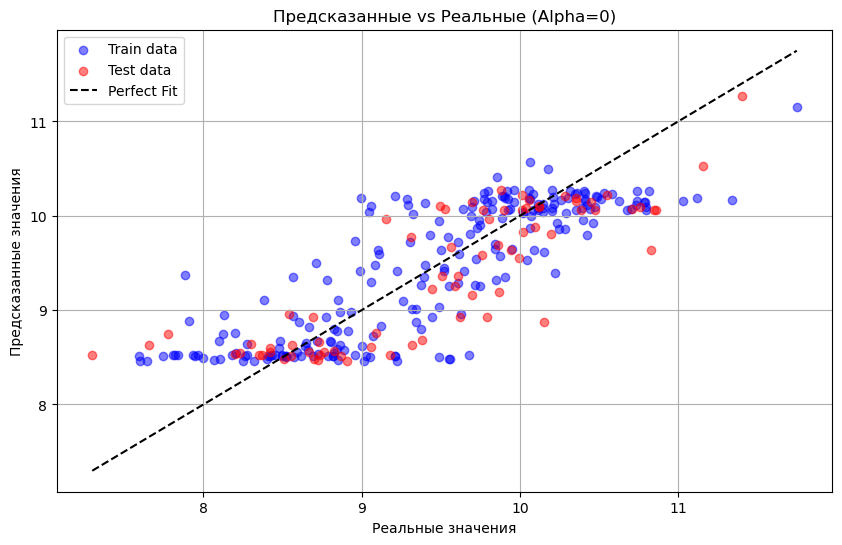

Alpha: 0.01
Отложенный MSE (train): 0.22945683362572958
Отложенный R2 (train): 0.681708088065224
Отложенный MSE (test): 0.2191968371106628
Отложенный R2 (test): 0.6970387463373178
Кросс-валидация MSE (train): 0.2234877746432044
Кросс-валидация R2 (train): 0.6903145941352651
Кросс-валидация MSE (test): 0.23650799139306877
Кросс-валидация R2 (test): 0.6706063150783514


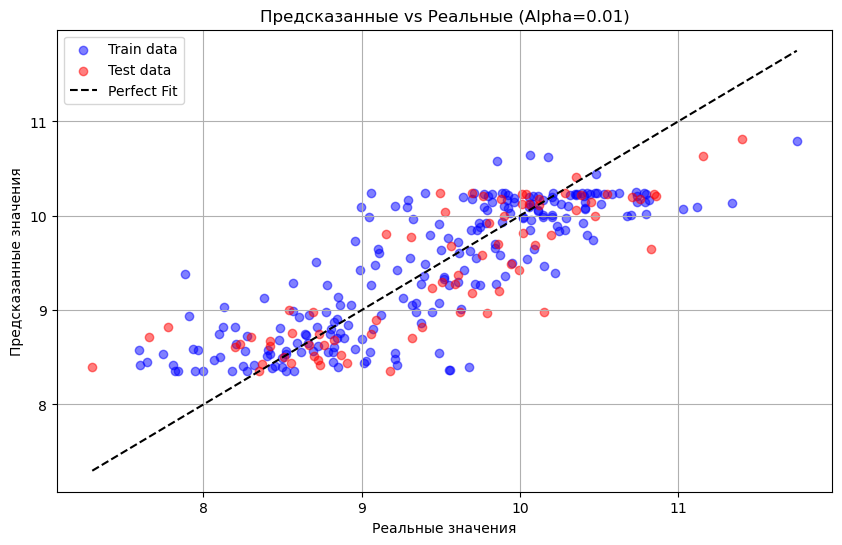

In [7]:
def plot_predictions_vs_actuals(model, X_train, y_train, X_test, y_test, alpha):
    # Обучение модели на тренировочных данных
    model.fit(X_train, y_train)
    
    # Предсказания для тренировочных и тестовых данных
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    
    # Отображение тренировочных данных
    plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train data')
    
    # Отображение тестовых данных
    plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test data')
    
    # Построение линии регрессии
    min_y = min(np.min(y_train), np.min(y_test))
    max_y = max(np.max(y_train), np.max(y_test))
    plt.plot([min_y, max_y], [min_y, max_y], color='black', linestyle='--', label='Perfect Fit')
    
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'Предсказанные vs Реальные (Alpha={alpha})')
    plt.legend()
    plt.grid(True)
    plt.show()

X = df.drop(columns='Y').values
y = df['Y'].values

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Определение моделей и параметров
alphas = [0, 0.01]

for alpha in alphas:
    print(f'Alpha: {alpha}')
    
    pipeline = Pipeline([
        ('scaler', StandardScaler(has_bias=True, apply_mean=True)),
        ('model', LinearRegressionWithRegularization(alpha=alpha))
    ])
    
    # Оценка с использованием holdout
    holdout_scores = run_holdout(pipeline, X, y, train_size=0.75, random_state=0)
    print(f'Отложенный MSE (train): {holdout_scores["train_mse"]}')
    print(f'Отложенный R2 (train): {holdout_scores["train_r2"]}')
    print(f'Отложенный MSE (test): {holdout_scores["test_mse"]}')
    print(f'Отложенный R2 (test): {holdout_scores["test_r2"]}')
    
    # Оценка с использованием кросс-валидации
    cross_val_scores = run_cross_val(pipeline, X, y, n_splits=4, shuffle=True, random_state=0)
    print(f'Кросс-валидация MSE (train): {cross_val_scores["train_mse"]}')
    print(f'Кросс-валидация R2 (train): {cross_val_scores["train_r2"]}')
    print(f'Кросс-валидация MSE (test): {cross_val_scores["test_mse"]}')
    print(f'Кросс-валидация R2 (test): {cross_val_scores["test_r2"]}')
    
    # Построение графиков предсказаний
    plot_predictions_vs_actuals(pipeline, X_train, y_train, X_test, y_test, alpha)


## Задача 2. Классификация и кросс-валидация

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("Cl_A5_V2.csv")
df

,X1,X2,Y
0,5.712051,4.420663,0
1,4.658783,6.312037,1
2,4.211528,4.934160,0
3,5.440266,5.688972,0
4,5.109973,7.006561,1
...,...,...,...
495,4.782801,5.331527,0
496,3.469108,5.801888,1
497,6.357797,4.195166,1
498,5.261725,4.757229,0


In [10]:
X = df[['X1', 'X2']].values
y = df['Y'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [12]:
def evaluate_polynomial_degrees(X_train, y_train, X_test, y_test, degrees):
    train_accuracies = []
    test_accuracies = []

    for degree in degrees:
        # Преобразование признаков в полиномиальные
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Логистическая регрессия с заданными параметрами
        model = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100, 
                                   C=1e5, solver='liblinear', random_state=12345)
        
        # Обучение модели
        model.fit(X_train_poly, y_train)
        
        # Предсказания
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Оценка точности (accuracy)
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    return train_accuracies, test_accuracies


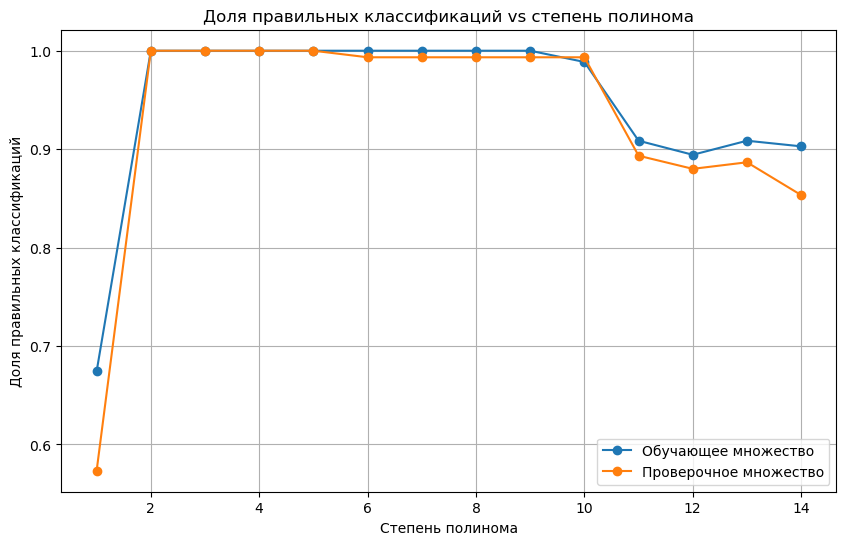

In [13]:
degrees = range(1, 15)  # Проверяем степени полинома от 1 до 15
train_accuracies, test_accuracies = evaluate_polynomial_degrees(X_train, y_train, X_test, y_test, degrees)

# Построение графика зависимости точности от степени полинома
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, label='Обучающее множество', marker='o')
plt.plot(degrees, test_accuracies, label='Проверочное множество', marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('Доля правильных классификаций')
plt.title('Доля правильных классификаций vs степень полинома')
plt.legend()
plt.grid(True)
plt.show()


Лучшая степень полинома: 2


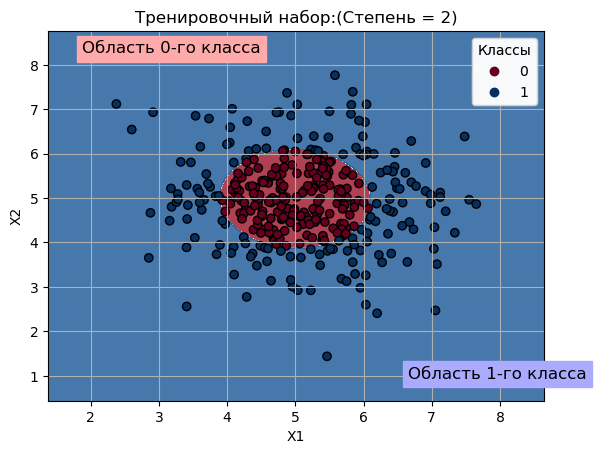

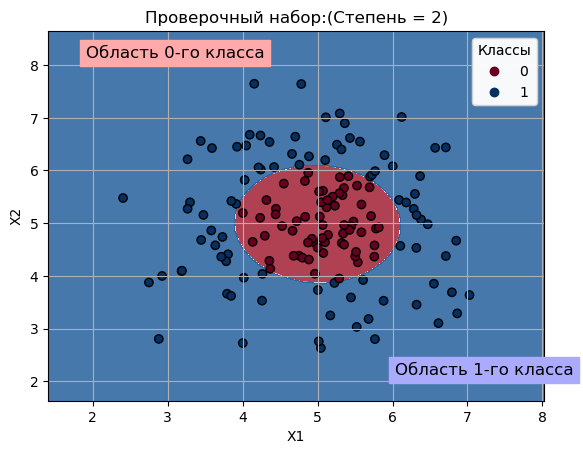

In [14]:
# Находим степень полинома с наилучшей точностью на тестовой выборке
best_degree = degrees[np.argmax(test_accuracies)]
print(f'Лучшая степень полинома: {best_degree}')

# Повторно обучаем модель с лучшей степенью полинома
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

best_model = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100, 
                                C=1e5, solver='liblinear', random_state=12345)
best_model.fit(X_train_poly, y_train)

# Предсказания
y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

def plot_decision_boundary(model, X, y, degree, title):
    # Генерируем сетку точек
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Преобразуем сетку в полиномиальные признаки
    poly = PolynomialFeatures(degree=degree)
    grid = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    
    # Предсказания для каждого элемента сетки
    Z = model.predict(grid).reshape(xx.shape)
    
    # Построение границы решений с цветовой заливкой
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    
    # Добавляем подписи на цветовые области
    plt.text(x_min + 0.5, y_max - 0.5, 'Область 0-го класса', fontsize=12, color='black', backgroundcolor='#FFAAAA')
    plt.text(x_max - 2.0, y_min + 0.5, 'Область 1-го класса', fontsize=12, color='black', backgroundcolor='#AAAAFF')
    
    # Отображение точек исходных данных
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdBu)
    
    # Добавление легенды
    legend1 = plt.legend(*scatter.legend_elements(), title="Классы")
    plt.gca().add_artist(legend1)
    
    # Подписи осей и заголовок
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Визуализация для обучающей выборки
plot_decision_boundary(best_model, X_train, y_train, best_degree, f'Тренировочный набор:(Степень = {best_degree})')

# Визуализация для тестовой выборки
plot_decision_boundary(best_model, X_test, y_test, best_degree, f'Проверочный набор:(Степень = {best_degree})')

## Задача 3. Классификация текстовых документов

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score
import time
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score

In [16]:
df = pd.read_csv("emails.tsv", sep='\t', header=None, names=["y","X"])
df = df.dropna()

In [17]:
# Предварительная обработка данных: удаление лишних символов, если необходимо
df['X'] = df['X'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Разделение на train/test с использованием стратифицированного разбиения
X = df['X']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
print(f'Размер обучающей выборки: {X_train.shape}, тестовой выборки: {X_test.shape}')


Размер обучающей выборки: (3460,), тестовой выборки: (865,)


In [18]:
df 

,y,X
0,0,\n\nCONSANTLY being\nbombarded by socalled FRE...
1,0,link to my webcam you wanted Wanna see sexuall...
2,1,Re How to manage multiple Internet connections...
3,0,SPAM Give her hour rodeoEnhance your desire ...
4,0,Best Price on the netffm suddenlysusanStoolmai...
...,...,...
4321,0,Aldebarans Spring Special OfferFrom nobody Sun...
4322,1,RE ILUG What HOWTOs for SOHO systemHi Dermot i...
4323,1,Spambayes hammiepy vs GBayespy\n Guido Ther...
4324,0,\n\r\nborder backgroundcolor \r\nborder backgr...


In [19]:
# Векторизация текстов: n-gram=1 (unigrams)
vectorizer_unigram = CountVectorizer(ngram_range=(1, 1))
X_train_unigram = vectorizer_unigram.fit_transform(X_train)
X_test_unigram = vectorizer_unigram.transform(X_test)

# Векторизация текстов: n-gram=2 (bigrams)
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_train_bigram = vectorizer_bigram.fit_transform(X_train)
X_test_bigram = vectorizer_bigram.transform(X_test)

# Векторизация текстов: n-gram=(1,2) (combination of unigrams and bigrams)
vectorizer_combined = CountVectorizer(ngram_range=(1, 2))
X_train_combined = vectorizer_combined.fit_transform(X_train)
X_test_combined = vectorizer_combined.transform(X_test)


In [20]:
# Задаём классификаторы и их гиперпараметры
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': np.arange(1, 150, 20)}
    },
    'Logistic Regression': {
        'model': LogisticRegression(penalty='l2', solver='liblinear', random_state=123),
        'param_grid': {'C': np.logspace(-2, 10, 8, base=10)}
    },
    'BernoulliNB': {
        'model': BernoulliNB(),
        'param_grid': {'alpha': np.logspace(-4, 1, 8, base=10)}
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'param_grid': {'alpha': np.logspace(-4, 1, 8, base=10)}
    }
}

In [21]:
# Стратифицированная кросс-валидация
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)

# Настройка метрики Balanced Accuracy
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Функция для выполнения GridSearch
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, scoring='balanced_accuracy', cv=kfold, n_jobs=-1, return_train_score=True)
    grid_search.fit(X_train, y_train)
    return grid_search

In [22]:
results = {}

# Оценка моделей
for name, config in models.items():
    print(f"Оценка для модели: {name}")
    
    # Выполняем Grid Search и сохраняем результаты
    grid_search = perform_grid_search(config['model'], config['param_grid'], X_train_unigram, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    results[name] = {
        'best_params': best_params,
        'best_score': best_score,
        'cv_results': grid_search.cv_results_  # Сохраняем cv_results для последующего использования
    }
    
    print(f"Лучшие параметры для {name}: {best_params}, Balanced Accuracy: {best_score}")

# Выводим результаты
for model, result in results.items():
    print(f"{model}: Лучшие параметры: {result['best_params']}, Balanced Accuracy: {result['best_score']}")

Оценка для модели: KNN
Лучшие параметры для KNN: {'n_neighbors': 1}, Balanced Accuracy: 0.8898928504972076
Оценка для модели: Logistic Regression
Лучшие параметры для Logistic Regression: {'C': 26.826957952797247}, Balanced Accuracy: 0.9731870615831227
Оценка для модели: BernoulliNB
Лучшие параметры для BernoulliNB: {'alpha': 0.0001}, Balanced Accuracy: 0.9120220059164372
Оценка для модели: MultinomialNB
Лучшие параметры для MultinomialNB: {'alpha': 0.07196856730011521}, Balanced Accuracy: 0.9485831166212446
KNN: Лучшие параметры: {'n_neighbors': 1}, Balanced Accuracy: 0.8898928504972076
Logistic Regression: Лучшие параметры: {'C': 26.826957952797247}, Balanced Accuracy: 0.9731870615831227
BernoulliNB: Лучшие параметры: {'alpha': 0.0001}, Balanced Accuracy: 0.9120220059164372
MultinomialNB: Лучшие параметры: {'alpha': 0.07196856730011521}, Balanced Accuracy: 0.9485831166212446


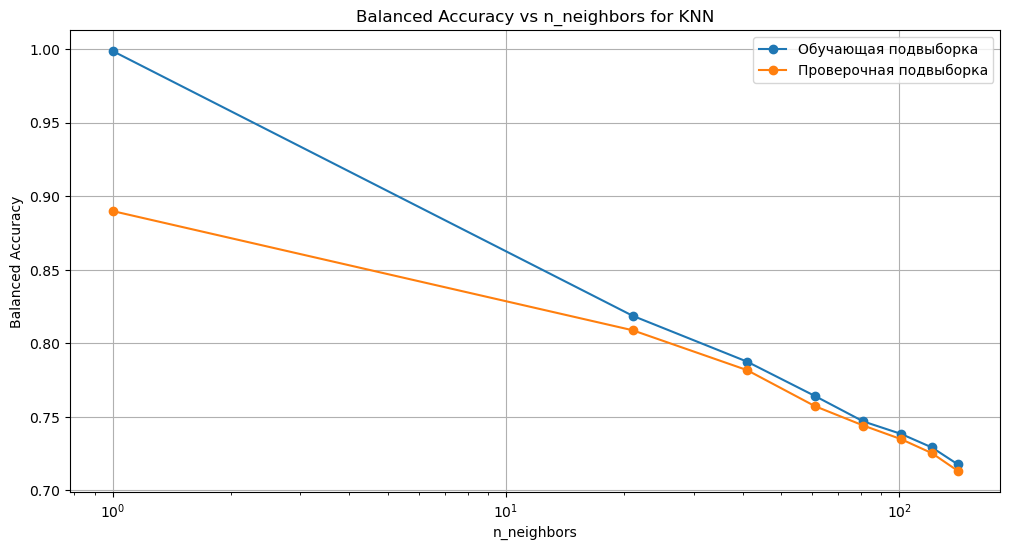

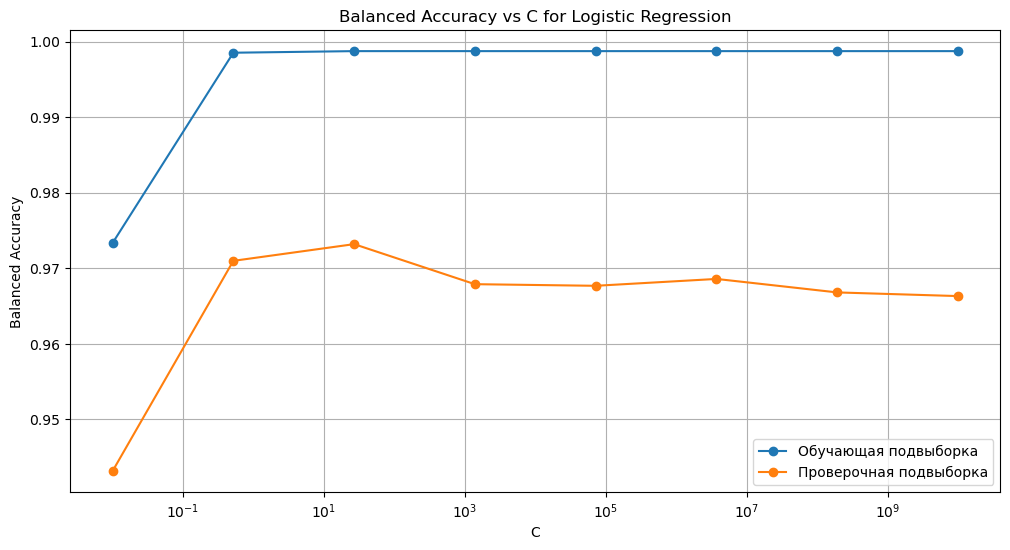

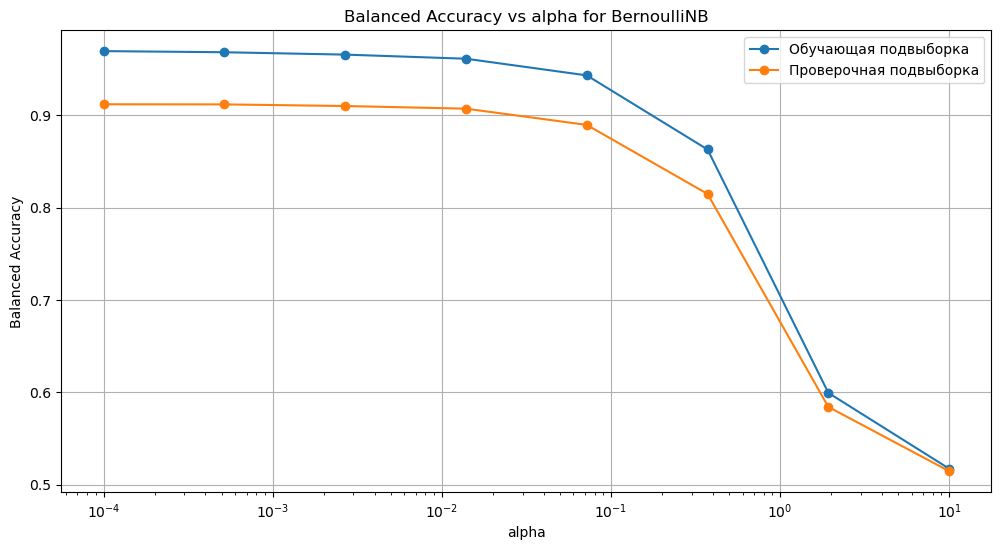

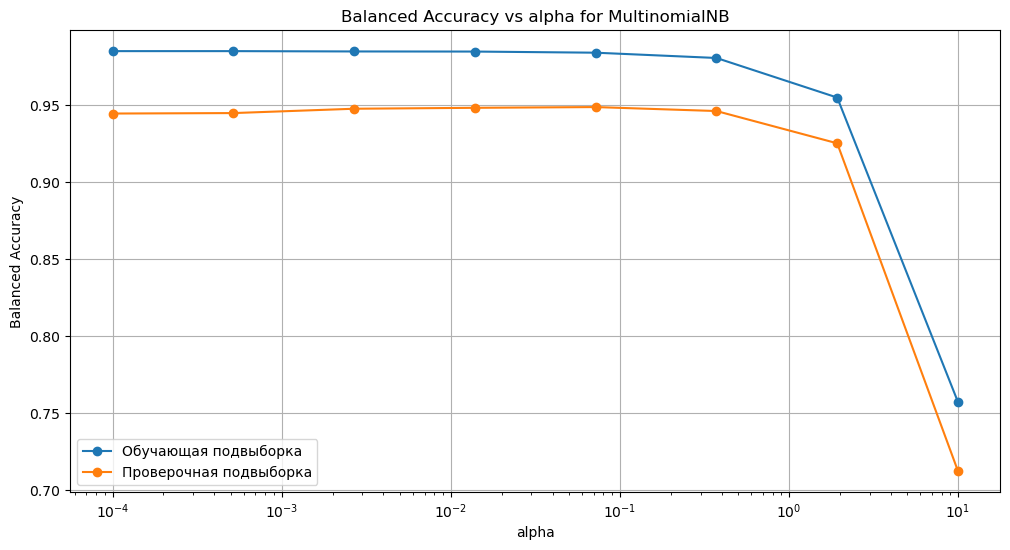

In [23]:
# Функция для построения графиков зависимости Balanced Accuracy от гиперпараметров
def plot_grid_search_results(cv_results, param_name, model_name):
    param_values = cv_results['param_' + param_name].data
    mean_train_scores = cv_results['mean_train_score']
    mean_test_scores = cv_results['mean_test_score']
    
    plt.figure(figsize=(12, 6))
    plt.plot(param_values, mean_train_scores, marker='o', label='Обучающая подвыборка')
    plt.plot(param_values, mean_test_scores, marker='o', label='Проверочная подвыборка')
    plt.xscale('log')  # Логарифмическая шкала для оси X, если параметры логарифмические
    plt.xlabel(param_name)
    plt.ylabel('Balanced Accuracy')
    plt.title(f'Balanced Accuracy vs {param_name} for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Оценка и визуализация результатов для всех моделей и n-граммов
for model, result in results.items():
    param_name = list(models[model]['param_grid'].keys())[0]  # Имя гиперпараметра
    cv_results = result['cv_results']  # Извлекаем cv_results
    plot_grid_search_results(cv_results, param_name, model)

In [24]:
def final_evaluation(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time
    
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return train_time, predict_time, balanced_acc, precision, recall, f1

In [25]:
final_results = {}

for model_name, result in results.items():
    print(f"Тестирование модели: {model_name}")
    
    # Инициализируем модель с лучшими параметрами
    best_params = result['best_params']
    model = models[model_name]['model'].set_params(**best_params)
    
    # Определяем соответствующие обучающие и тестовые данные
    if 'unigram' in model_name.lower():
        X_train_model = X_train_unigram
        X_test_model = X_test_unigram
    elif 'bigram' in model_name.lower():
        X_train_model = X_train_bigram
        X_test_model = X_test_bigram
    else:
        X_train_model = X_train_combined
        X_test_model = X_test_combined
    
    # Выполняем финальную оценку модели
    train_time, predict_time, balanced_acc, precision, recall, f1 = final_evaluation(model, X_train_model, X_test_model, y_train, y_test)
    
    final_results[model_name] = {
        'train_time': train_time,
        'predict_time': predict_time,
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    print(f"{model_name}: Время обучения: {train_time:.4f} сек, Время предсказания: {predict_time:.4f} сек")
    print(f"Balanced Accuracy: {balanced_acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

Тестирование модели: KNN


C:\Users\kksama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN: Время обучения: 0.0060 сек, Время предсказания: 0.3952 сек
Balanced Accuracy: 0.8726, Precision: 0.9808, Recall: 0.7780, F1: 0.8677
Тестирование модели: Logistic Regression
Logistic Regression: Время обучения: 3.3897 сек, Время предсказания: 0.0030 сек
Balanced Accuracy: 0.9789, Precision: 0.9897, Recall: 0.9797, F1: 0.9847
Тестирование модели: BernoulliNB
BernoulliNB: Время обучения: 0.0420 сек, Время предсказания: 0.0480 сек
Balanced Accuracy: 0.9129, Precision: 0.9260, Recall: 0.9966, F1: 0.9600
Тестирование модели: MultinomialNB
MultinomialNB: Время обучения: 0.0320 сек, Время предсказания: 0.0080 сек
Balanced Accuracy: 0.9707, Precision: 0.9814, Recall: 0.9814, F1: 0.9814


In [26]:
# Преобразуем результаты в DataFrame для удобного отображения
results_df = pd.DataFrame(final_results).T
print(results_df)

                     train_time  predict_time  balanced_accuracy  precision  \
KNN                    0.005998      0.395220           0.872619   0.980769   
Logistic Regression    3.389675      0.002997           0.978921   0.989726   
BernoulliNB            0.041975      0.047989           0.912851   0.925984   
MultinomialNB          0.031981      0.007995           0.970678   0.981356   

                       recall        f1  
KNN                  0.777966  0.867675  
Logistic Regression  0.979661  0.984668  
BernoulliNB          0.996610  0.960000  
MultinomialNB        0.981356  0.981356  


Оценка для n-gram: 1-gram
Оценка для модели: KNN
Лучшие параметры для KNN: {'n_neighbors': 1}, Balanced Accuracy: 0.8898928504972076


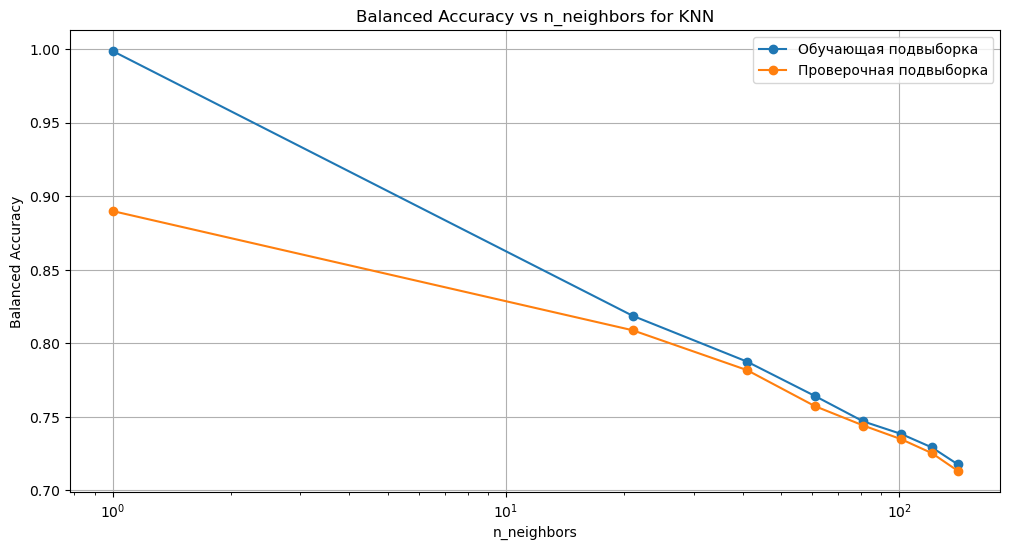

C:\Users\kksama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Оценка для модели: Logistic Regression
Лучшие параметры для Logistic Regression: {'C': 26.826957952797247}, Balanced Accuracy: 0.9731870615831227


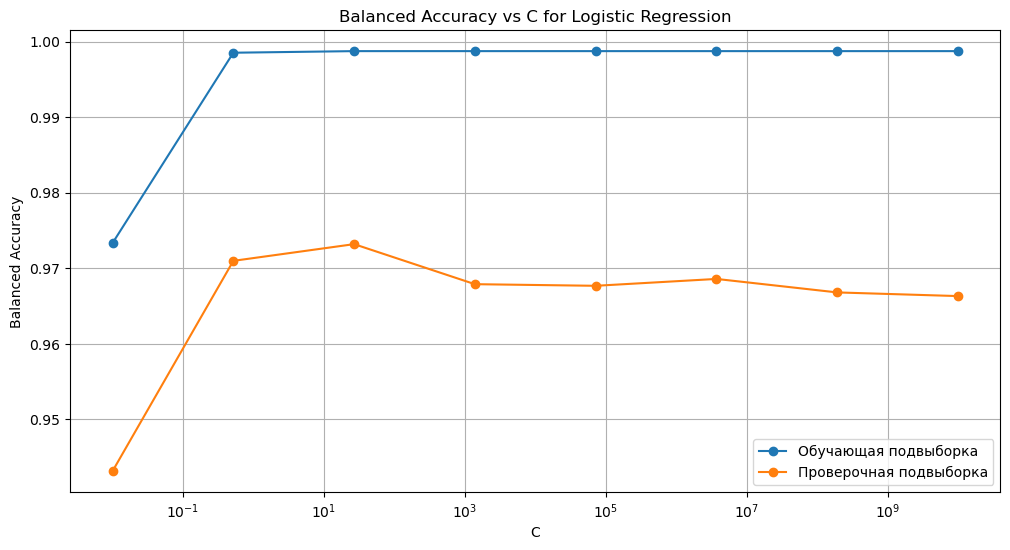

Оценка для модели: BernoulliNB
Лучшие параметры для BernoulliNB: {'alpha': 0.0001}, Balanced Accuracy: 0.9120220059164372


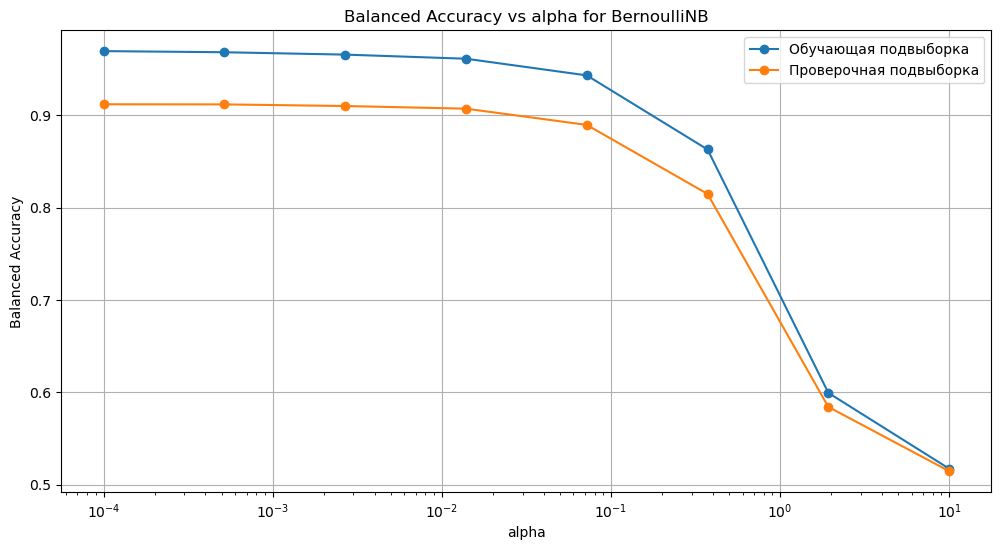

Оценка для модели: MultinomialNB
Лучшие параметры для MultinomialNB: {'alpha': 0.07196856730011521}, Balanced Accuracy: 0.9485831166212446


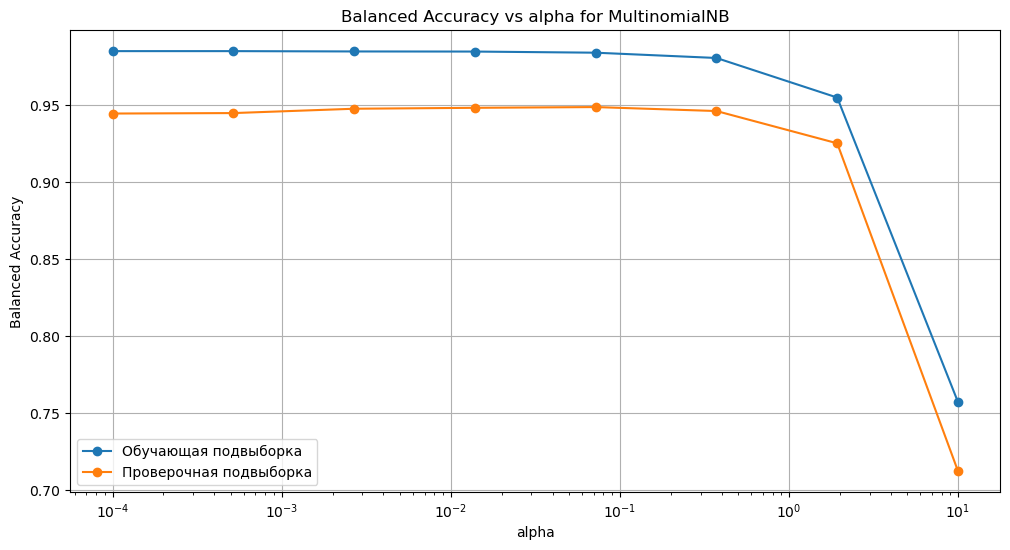

Оценка для n-gram: 2-gram
Оценка для модели: KNN
Лучшие параметры для KNN: {'n_neighbors': 1}, Balanced Accuracy: 0.7650100390946182


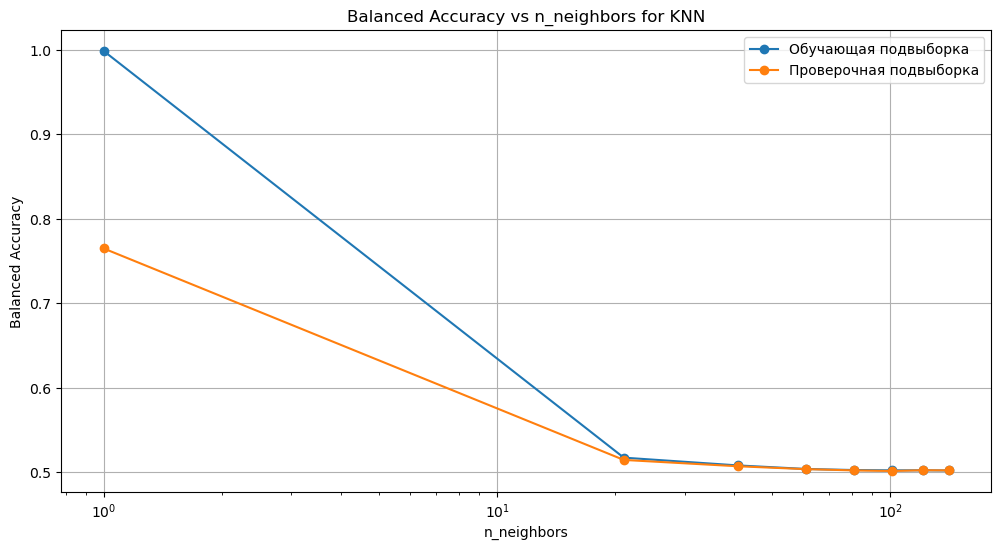

C:\Users\kksama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Оценка для модели: Logistic Regression
Лучшие параметры для Logistic Regression: {'C': 1389.4954943731361}, Balanced Accuracy: 0.9628494019887542


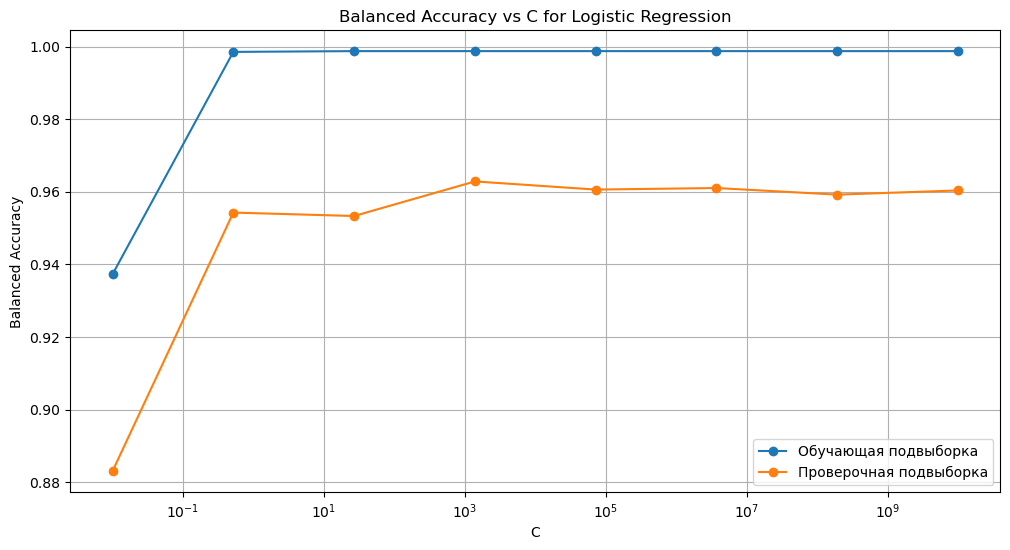

Оценка для модели: BernoulliNB
Лучшие параметры для BernoulliNB: {'alpha': 0.0001}, Balanced Accuracy: 0.9194001495829032


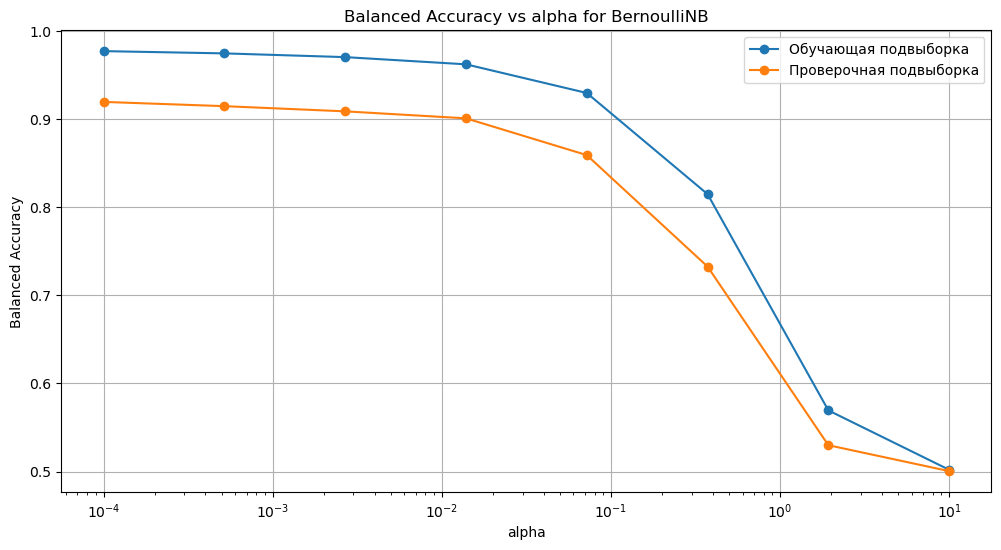

Оценка для модели: MultinomialNB
Лучшие параметры для MultinomialNB: {'alpha': 0.0001}, Balanced Accuracy: 0.9579681096275786


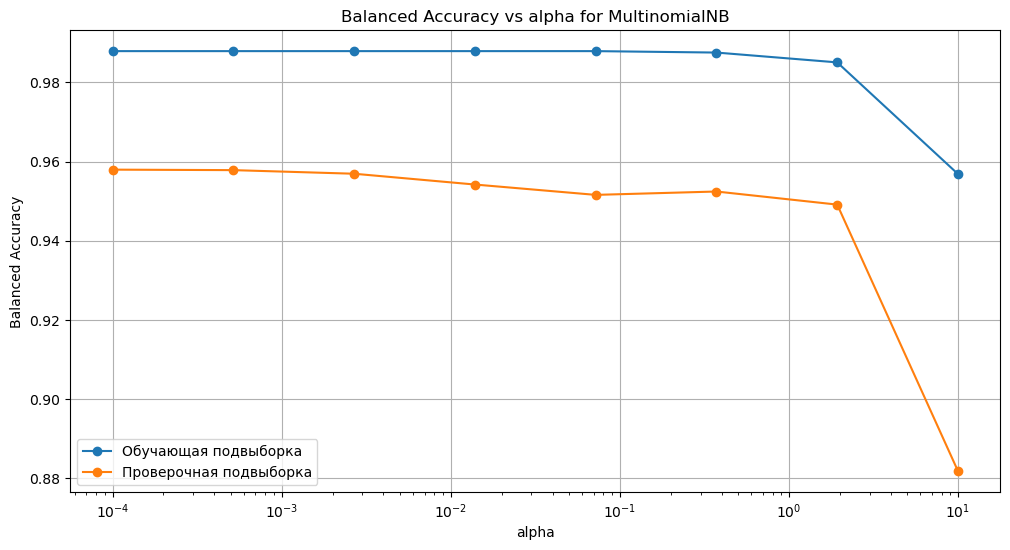

Оценка для n-gram: 1,2-gram
Оценка для модели: KNN
Лучшие параметры для KNN: {'n_neighbors': 1}, Balanced Accuracy: 0.8661785718794681


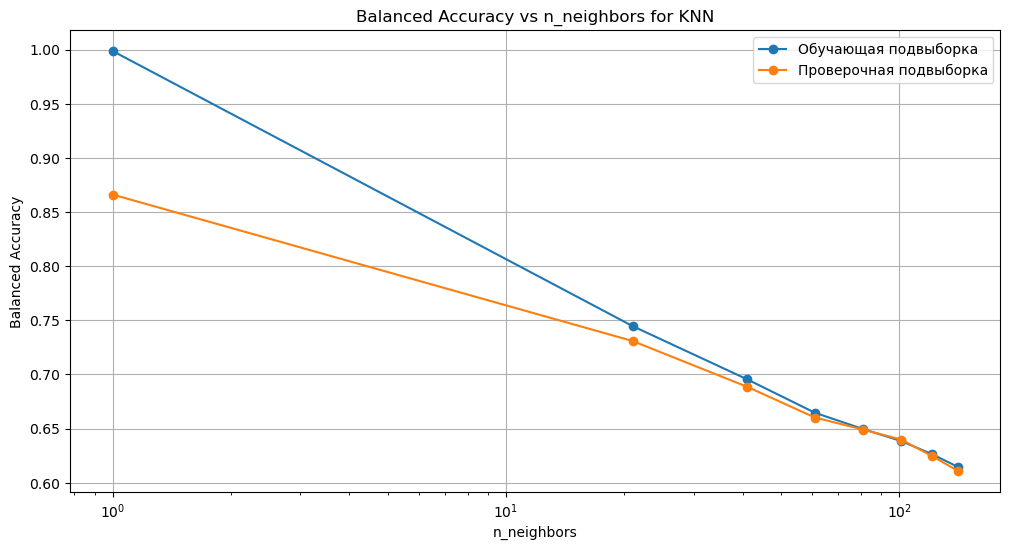

C:\Users\kksama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Оценка для модели: Logistic Regression
Лучшие параметры для Logistic Regression: {'C': 1389.4954943731361}, Balanced Accuracy: 0.9701529470872564


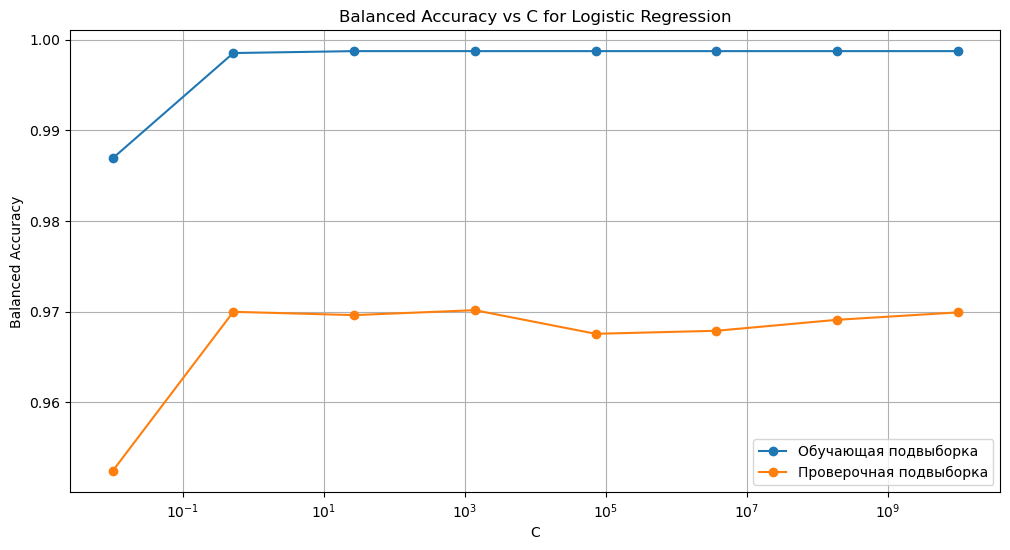

Оценка для модели: BernoulliNB
Лучшие параметры для BernoulliNB: {'alpha': 0.0001}, Balanced Accuracy: 0.9208458431391193


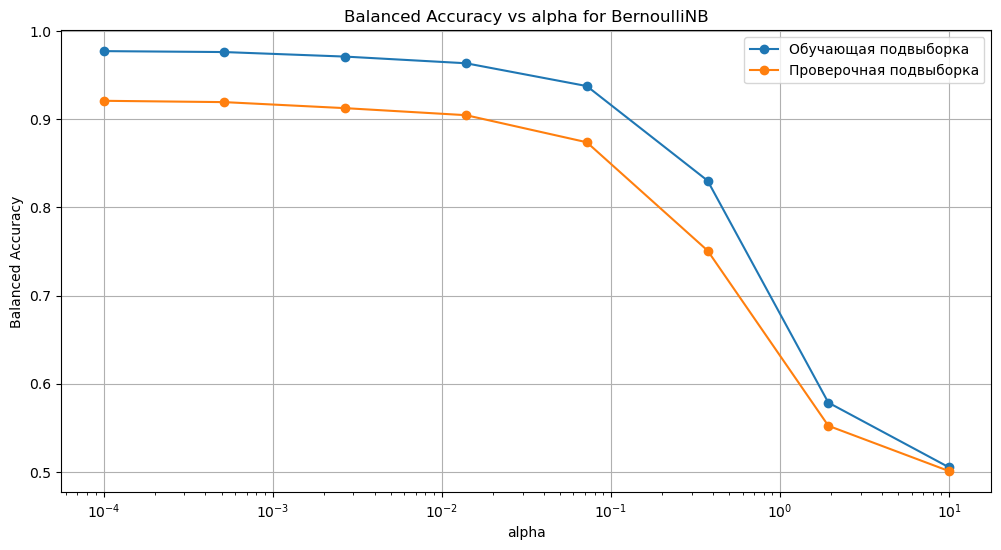

Оценка для модели: MultinomialNB
Лучшие параметры для MultinomialNB: {'alpha': 0.002682695795279727}, Balanced Accuracy: 0.9614442560756633


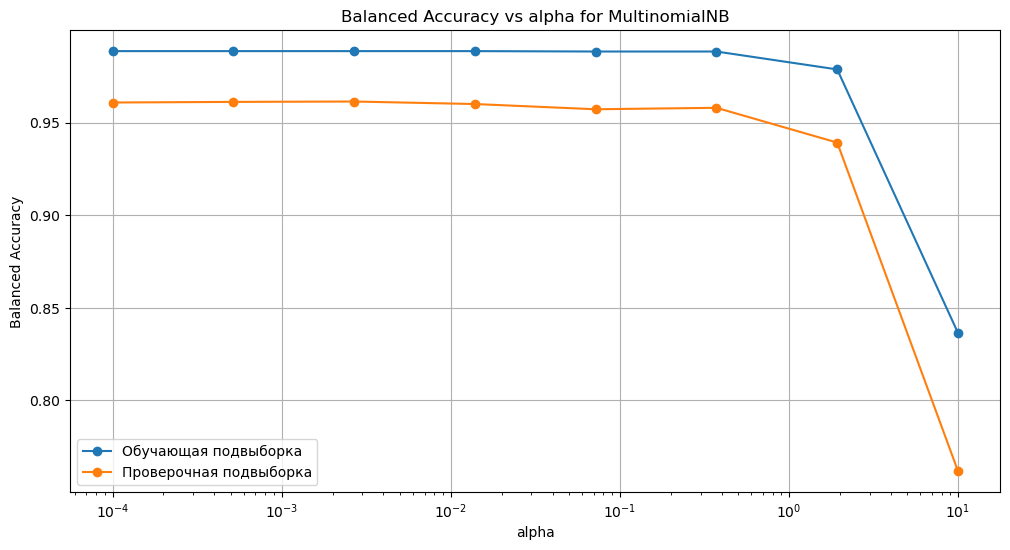

KNN: n-gram: 1,2-gram, Лучшие параметры: {'n_neighbors': 1}, Balanced Accuracy: 0.8661785718794681, Время обучения: 0.0049991607666015625, Время предсказания: 0.3073253631591797, Balanced Accuracy: 0.8726194144838213, Precision: 0.9807692307692307, Recall: 0.7779661016949152, F1: 0.8676748582230623
Logistic Regression: n-gram: 1,2-gram, Лучшие параметры: {'C': 1389.4954943731361}, Balanced Accuracy: 0.9701529470872564, Время обучения: 3.655635118484497, Время предсказания: 0.002998828887939453, Balanced Accuracy: 0.9762557781201848, Precision: 0.988013698630137, Recall: 0.9779661016949153, F1: 0.9829642248722316
BernoulliNB: n-gram: 1,2-gram, Лучшие параметры: {'alpha': 0.0001}, Balanced Accuracy: 0.9208458431391193, Время обучения: 0.05896353721618652, Время предсказания: 0.0339813232421875, Balanced Accuracy: 0.9128505392912173, Precision: 0.925984251968504, Recall: 0.9966101694915255, F1: 0.9600000000000001
MultinomialNB: n-gram: 1,2-gram, Лучшие параметры: {'alpha': 0.0026826957952

In [27]:
ngrams = {
    '1-gram': (X_train_unigram, X_test_unigram),
    '2-gram': (X_train_bigram, X_test_bigram),
    '1,2-gram': (X_train_combined, X_test_combined)
}

# Словарь для хранения результатов
final_results = {}

for ngram_type, (X_train_ngram, X_test_ngram) in ngrams.items():
    print(f"Оценка для n-gram: {ngram_type}")
    
    # Оценка моделей
    for name, config in models.items():
        print(f"Оценка для модели: {name}")
        
        # Выполняем Grid Search и сохраняем результаты
        grid_search = perform_grid_search(config['model'], config['param_grid'], X_train_ngram, y_train)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        final_results[name] = {
            'ngram': ngram_type,
            'best_params': best_params,
            'best_score': best_score,
            'cv_results': grid_search.cv_results_  # Сохраняем cv_results для последующего использования
        }
        
        print(f"Лучшие параметры для {name}: {best_params}, Balanced Accuracy: {best_score}")

        # Построение графиков
        param_name = list(config['param_grid'].keys())[0]  # Имя гиперпараметра
        plot_grid_search_results(grid_search.cv_results_, param_name, name)
        
        # Финальная оценка
        model = config['model'].set_params(**best_params)
        train_time, predict_time, balanced_acc, precision, recall, f1 = final_evaluation(model, X_train_ngram, X_test_ngram, y_train, y_test)
        
        # Сохранение финальных результатов
        final_results[name].update({
            'train_time': train_time,
            'predict_time': predict_time,
            'balanced_accuracy': balanced_acc,
            'precision': precision,
            'recall': recall,
            'f1': f1
        })

# Выводим результаты
for model, result in final_results.items():
    print(f"{model}: n-gram: {result['ngram']}, Лучшие параметры: {result['best_params']}, Balanced Accuracy: {result['best_score']}, "
          f"Время обучения: {result['train_time']}, Время предсказания: {result['predict_time']}, "
          f"Balanced Accuracy: {result['balanced_accuracy']}, Precision: {result['precision']}, Recall: {result['recall']}, F1: {result['f1']}")

In [28]:
# Словарь для хранения итоговых данных
final_results = {}

# Обработка всех вариантов n-gram
for ngram_type, (X_train_ngram, X_test_ngram) in {
    '1-gram': (X_train_unigram, X_test_unigram),
    '2-gram': (X_train_bigram, X_test_bigram),
    '1,2-gram': (X_train_combined, X_test_combined)
}.items():
    print(f"Оценка для n-gram: {ngram_type}")
    
    for name, config in models.items():
        print(f"Оценка для модели: {name}")
        
        # Выполняем Grid Search и сохраняем результаты
        grid_search = perform_grid_search(config['model'], config['param_grid'], X_train_ngram, y_train)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        # Финальная оценка на тестовом наборе
        model = config['model'].set_params(**best_params)
        train_time, predict_time, balanced_acc, precision, recall, f1 = final_evaluation(
            model, X_train_ngram, X_test_ngram, y_train, y_test
        )
        
        # Сохраняем результаты
        final_results[f"{name}_{ngram_type}"] = {
            'ngram': ngram_type,
            'best_params': best_params,
            'best_score': best_score,
            'train_time': train_time,
            'predict_time': predict_time,
            'balanced_accuracy': balanced_acc,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        
        print(f"Лучшие параметры для {name} с {ngram_type}: {best_params}, Balanced Accuracy: {best_score}")

# Создаем DataFrame и выводим его
results_data = []
for model, result in final_results.items():
    results_data.append({
        'Method': model,
        'n-gram': result['ngram'],
        'Best Parameter Value': result['best_params'],
        'Training Time (s)': result['train_time'],
        'Prediction Time (s)': result['predict_time'],
        'Balanced Accuracy': result['balanced_accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1 Score': result['f1']
    })

results_df = pd.DataFrame(results_data)
results_df

Оценка для n-gram: 1-gram
Оценка для модели: KNN


C:\Users\kksama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Лучшие параметры для KNN с 1-gram: {'n_neighbors': 1}, Balanced Accuracy: 0.8898928504972076
Оценка для модели: Logistic Regression
Лучшие параметры для Logistic Regression с 1-gram: {'C': 26.826957952797247}, Balanced Accuracy: 0.9731870615831227
Оценка для модели: BernoulliNB
Лучшие параметры для BernoulliNB с 1-gram: {'alpha': 0.0001}, Balanced Accuracy: 0.9120220059164372
Оценка для модели: MultinomialNB
Лучшие параметры для MultinomialNB с 1-gram: {'alpha': 0.07196856730011521}, Balanced Accuracy: 0.9485831166212446
Оценка для n-gram: 2-gram
Оценка для модели: KNN


C:\Users\kksama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Лучшие параметры для KNN с 2-gram: {'n_neighbors': 1}, Balanced Accuracy: 0.7650100390946182
Оценка для модели: Logistic Regression
Лучшие параметры для Logistic Regression с 2-gram: {'C': 1389.4954943731361}, Balanced Accuracy: 0.9628494019887542
Оценка для модели: BernoulliNB
Лучшие параметры для BernoulliNB с 2-gram: {'alpha': 0.0001}, Balanced Accuracy: 0.9194001495829032
Оценка для модели: MultinomialNB
Лучшие параметры для MultinomialNB с 2-gram: {'alpha': 0.0001}, Balanced Accuracy: 0.9579681096275786
Оценка для n-gram: 1,2-gram
Оценка для модели: KNN


C:\Users\kksama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Лучшие параметры для KNN с 1,2-gram: {'n_neighbors': 1}, Balanced Accuracy: 0.8661785718794681
Оценка для модели: Logistic Regression
Лучшие параметры для Logistic Regression с 1,2-gram: {'C': 1389.4954943731361}, Balanced Accuracy: 0.9701529470872564
Оценка для модели: BernoulliNB
Лучшие параметры для BernoulliNB с 1,2-gram: {'alpha': 0.0001}, Balanced Accuracy: 0.9208458431391193
Оценка для модели: MultinomialNB
Лучшие параметры для MultinomialNB с 1,2-gram: {'alpha': 0.002682695795279727}, Balanced Accuracy: 0.9614442560756633


,Method,n-gram,Best Parameter Value,Training Time (s),Prediction Time (s),Balanced Accuracy,Precision,Recall,F1 Score
0,KNN_1-gram,1-gram,{'n_neighbors': 1},0.002997,0.222711,0.897673,0.976331,0.838983,0.902461
1,Logistic Regression_1-gram,1-gram,{'C': 26.826957952797247},0.412101,0.001000,0.983405,0.993139,0.981356,0.987212
2,BernoulliNB_1-gram,1-gram,{'alpha': 0.0001},0.012991,0.005996,0.915162,0.932476,0.983051,0.957096
3,MultinomialNB_1-gram,1-gram,{'alpha': 0.07196856730011521},0.005997,0.000999,0.948629,0.969283,0.962712,0.965986
4,KNN_2-gram,2-gram,{'n_neighbors': 1},0.002999,0.179307,0.775146,0.957333,0.608475,0.744041
5,Logistic Regression_2-gram,2-gram,{'C': 1389.4954943731361},3.058542,0.002999,0.961972,0.989362,0.945763,0.967071
6,BernoulliNB_2-gram,2-gram,{'alpha': 0.0001},0.033525,0.026984,0.906549,0.921507,0.994915,0.956805
7,MultinomialNB_2-gram,2-gram,{'alpha': 0.0001},0.027047,0.005579,0.948613,0.958882,0.988136,0.973289
8,"KNN_1,2-gram","1,2-gram",{'n_neighbors': 1},0.008895,0.318474,0.872619,0.980769,0.777966,0.867675
9,"Logistic Regression_1,2-gram","1,2-gram",{'C': 1389.4954943731361},3.847574,0.001999,0.976256,0.988014,0.977966,0.982964


## Исходя из полученных результатов можно сделать следующие выводы:
<p> Метод KNN </br> Метод показывает быстрое время обучения и предсказания по сравнению с другими моделями. Однако, его производительность значительно варьируется в зависимости от используемых n-gram. При использовании только 1-gram, KNN демонстрирует хорошую точность и сбалансированные метрики. В случае использования 2-gram, точность заметно снижается, что может указывать на плохое обобщение модели на более сложные данные. Вариант с 1,2-gram предлагает компромисс, но время предсказания увеличивается.</p> <p>Логистическая регрессия </br> Модель имеет самое высокое время обучения среди всех моделей, что может быть критично при работе с большими данными. Тем не менее, её производительность в плане точности, сбалансированности и полноты является наилучшей. Логистическая регрессия показывает высокие значения Balanced Accuracy, Precision и Recall, особенно при использовании комбинации 1,2-gram. Время предсказания незначительно увеличивается по сравнению с наивными Байесовскими моделями.</p> <p>Модели наивного Байеса </br>  Модели показывают хорошие результаты с относительно быстрым временем обучения и предсказания. Из них, модель Бернулли обучается быстрее, но имеет менее сбалансированное соотношение Precision и Recall. Полиномиальная модель обеспечивает более высокую точность и сбалансированные метрики, но время обучения и предсказания увеличивается. Полиномиальная модель имеет наибольшую точность, особенно при использовании 1,2-gram.</p> <p>Влияние n-gram на результаты моделей также заметно. Использование только unigram (1, 1) или комбинации unigram и bigram (1, 2) обеспечивает наилучшие результаты по точности. Применение только bigram (2-gram) в большинстве случаев приводит к снижению точности, что указывает на то, что более сложные n-gram могут не всегда улучшать производительность моделей и могут приводить к переобучению.</p>